In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean

In [3]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

In [4]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [5]:
O2_SSP126_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [6]:
O2_SSP245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [7]:
O2_SSP585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [8]:
O2_SSP126_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15681,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Omon,o2,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [11]:
o2sat_ssp126_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [12]:
o2sat_ssp245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [13]:
o2sat_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [14]:
o2sat_ssp126_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15679,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Omon,o2sat,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [45]:
gcs = gcsfs.GCSFileSystem(token='anon')
#datasets for O2
zstore_O2_SSP126_data = O2_SSP126_data.zstore.values[-1]
zstore_O2_SSP245_data = O2_SSP245_data.zstore.values[-1]
zstore_O2_SSP585_data = O2_SSP585_data.zstore.values[-1]

In [46]:
# create a mutable-mapping-style interface to the store
mapper_O2_SSP126 = gcs.get_mapper(zstore_O2_SSP126_data)
# open the dataset using xarray and zarr
O2_SSP126 = xr.open_zarr(mapper_O2_SSP126, 
                                consolidated=True,use_cftime=True).o2.rename({'lat':'latitude',
                                                             'lon':'longitude'})
mapper_O2_SSP245 = gcs.get_mapper(zstore_O2_SSP245_data)
O2_SSP245 = xr.open_zarr(mapper_O2_SSP245, 
                                consolidated=True,use_cftime=True).o2.rename({'lat':'latitude',
                                                             'lon':'longitude'})
mapper_O2_SSP585 = gcs.get_mapper(zstore_O2_SSP585_data)
O2_SSP585 = xr.open_zarr(mapper_O2_SSP585, 
                                consolidated=True,use_cftime=True).o2.rename({'lat':'latitude',
                                                             'lon':'longitude'})


In [53]:
zstore_o2sat_ssp126 = o2sat_ssp126_data.zstore.values[-1]
zstore_o2sat_ssp245 = o2sat_ssp245_data.zstore.values[-1]
zstore_o2sat_ssp585 = o2sat_ssp585_data.zstore.values[-1]

In [54]:
mapper_o2sat_ssp126 = gcs.get_mapper(zstore_o2sat_ssp126)
O2_sat_SSP126 = xr.open_zarr(mapper_o2sat_ssp126, 
                                consolidated=True,use_cftime=True).o2sat.rename({'lat':'latitude',
                                                             'lon':'longitude'})
mapper_o2sat_ssp245 = gcs.get_mapper(zstore_o2sat_ssp245)
O2_sat_SSP245 = xr.open_zarr(mapper_o2sat_ssp245, 
                                consolidated=True,use_cftime=True).o2sat.rename({'lat':'latitude',
                                                             'lon':'longitude'})
mapper_o2sat_ssp585 = gcs.get_mapper(zstore_o2sat_ssp585)
O2_sat_SSP585 = xr.open_zarr(mapper_o2sat_ssp585, 
                                consolidated=True,use_cftime=True).o2sat.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [68]:
#difference plots for 02
diff_O2_SSP126=(O2_SSP126.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_SSP126.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

diff_O2_SSP245=(O2_SSP245.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_SSP245.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

diff_O2_SSP585=(O2_SSP585.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_SSP585.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

#difference plots for 02sat
diff_O2sat_SSP126=(O2_sat_SSP126.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_sat_SSP126.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

diff_O2sat_SSP245=(O2_sat_SSP245.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_sat_SSP245.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

diff_O2sat_SSP585=(O2_sat_SSP585.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_sat_SSP585.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

Text(0.5, 1.0, 'Difference in Dissolved Oxygen Content for SSP126 at SS')

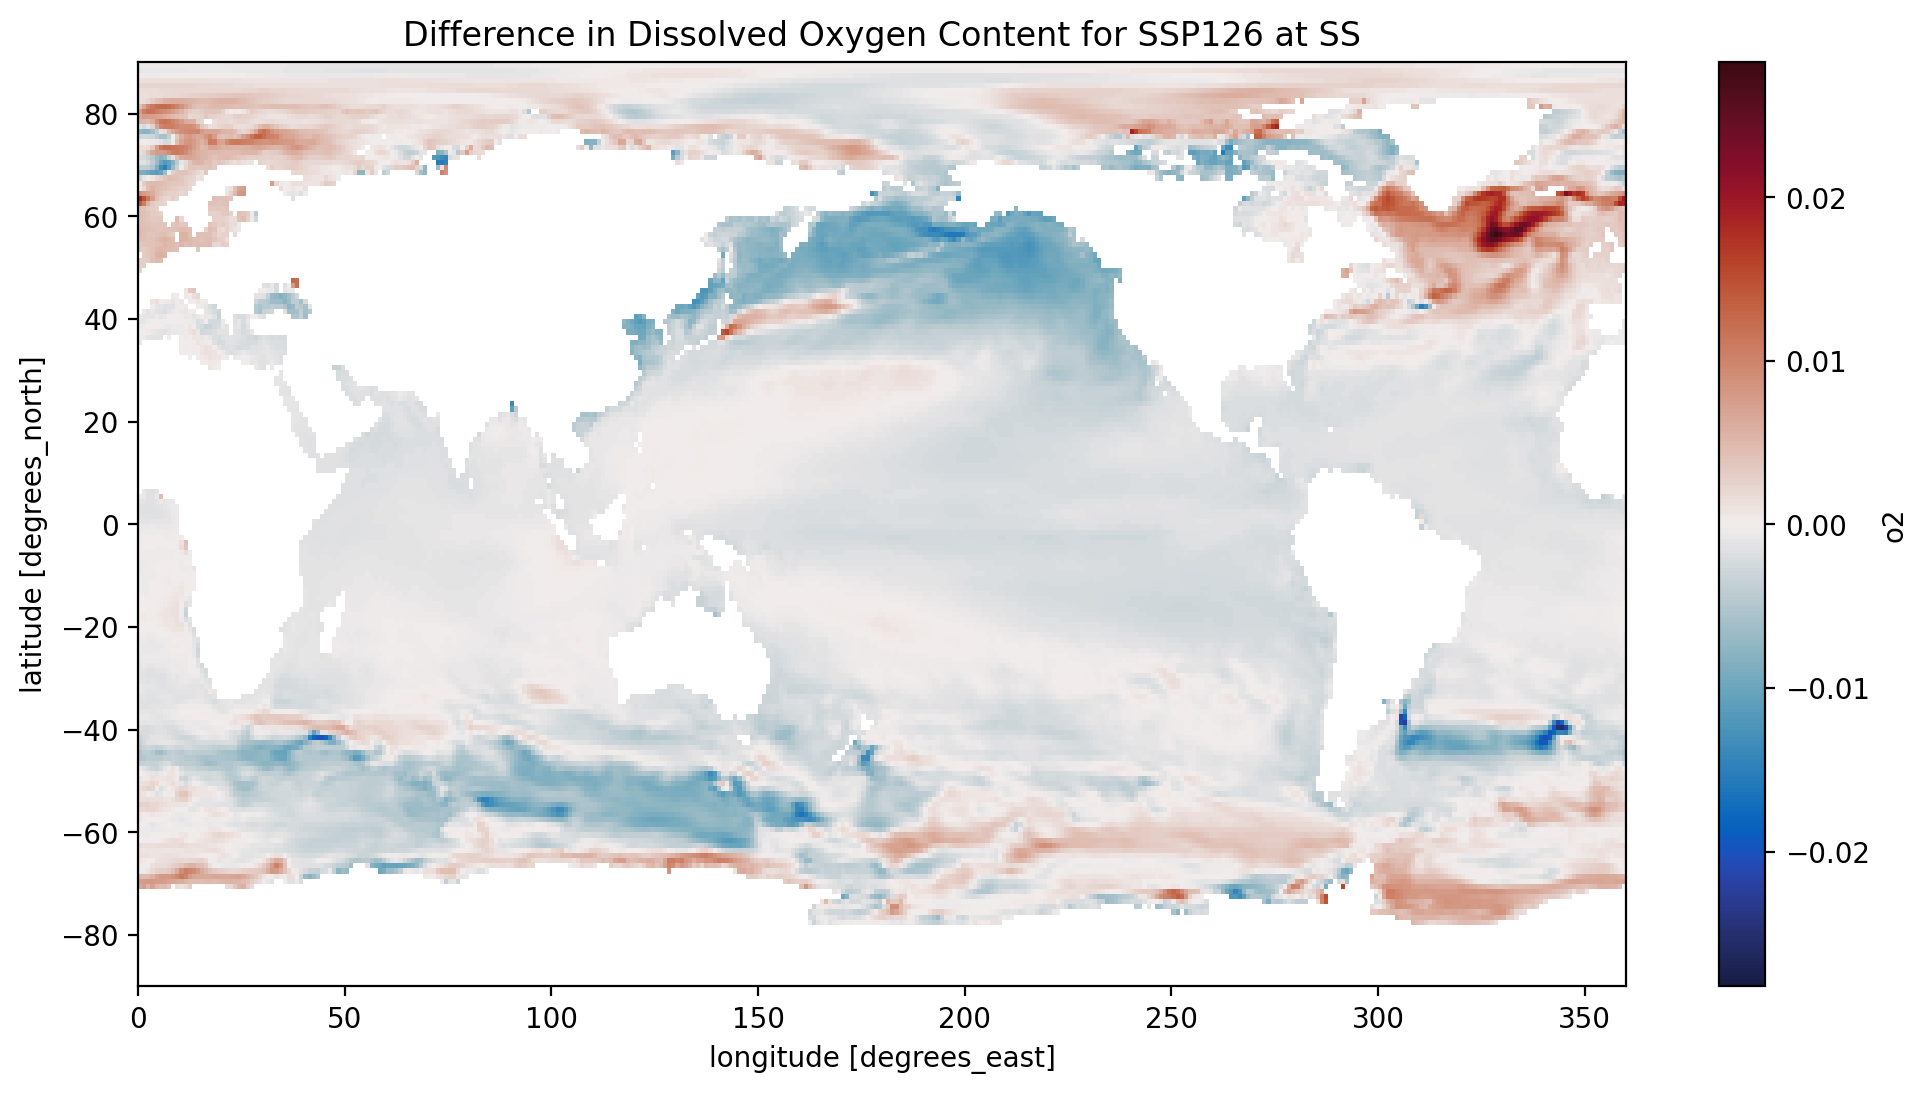

In [57]:
diff_126_O2_Surface = diff_O2_SSP126.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content for SSP126 at SS')

Text(0.5, 1.0, 'Difference in Dissolved Oxygen Content for SSP245 at SS')

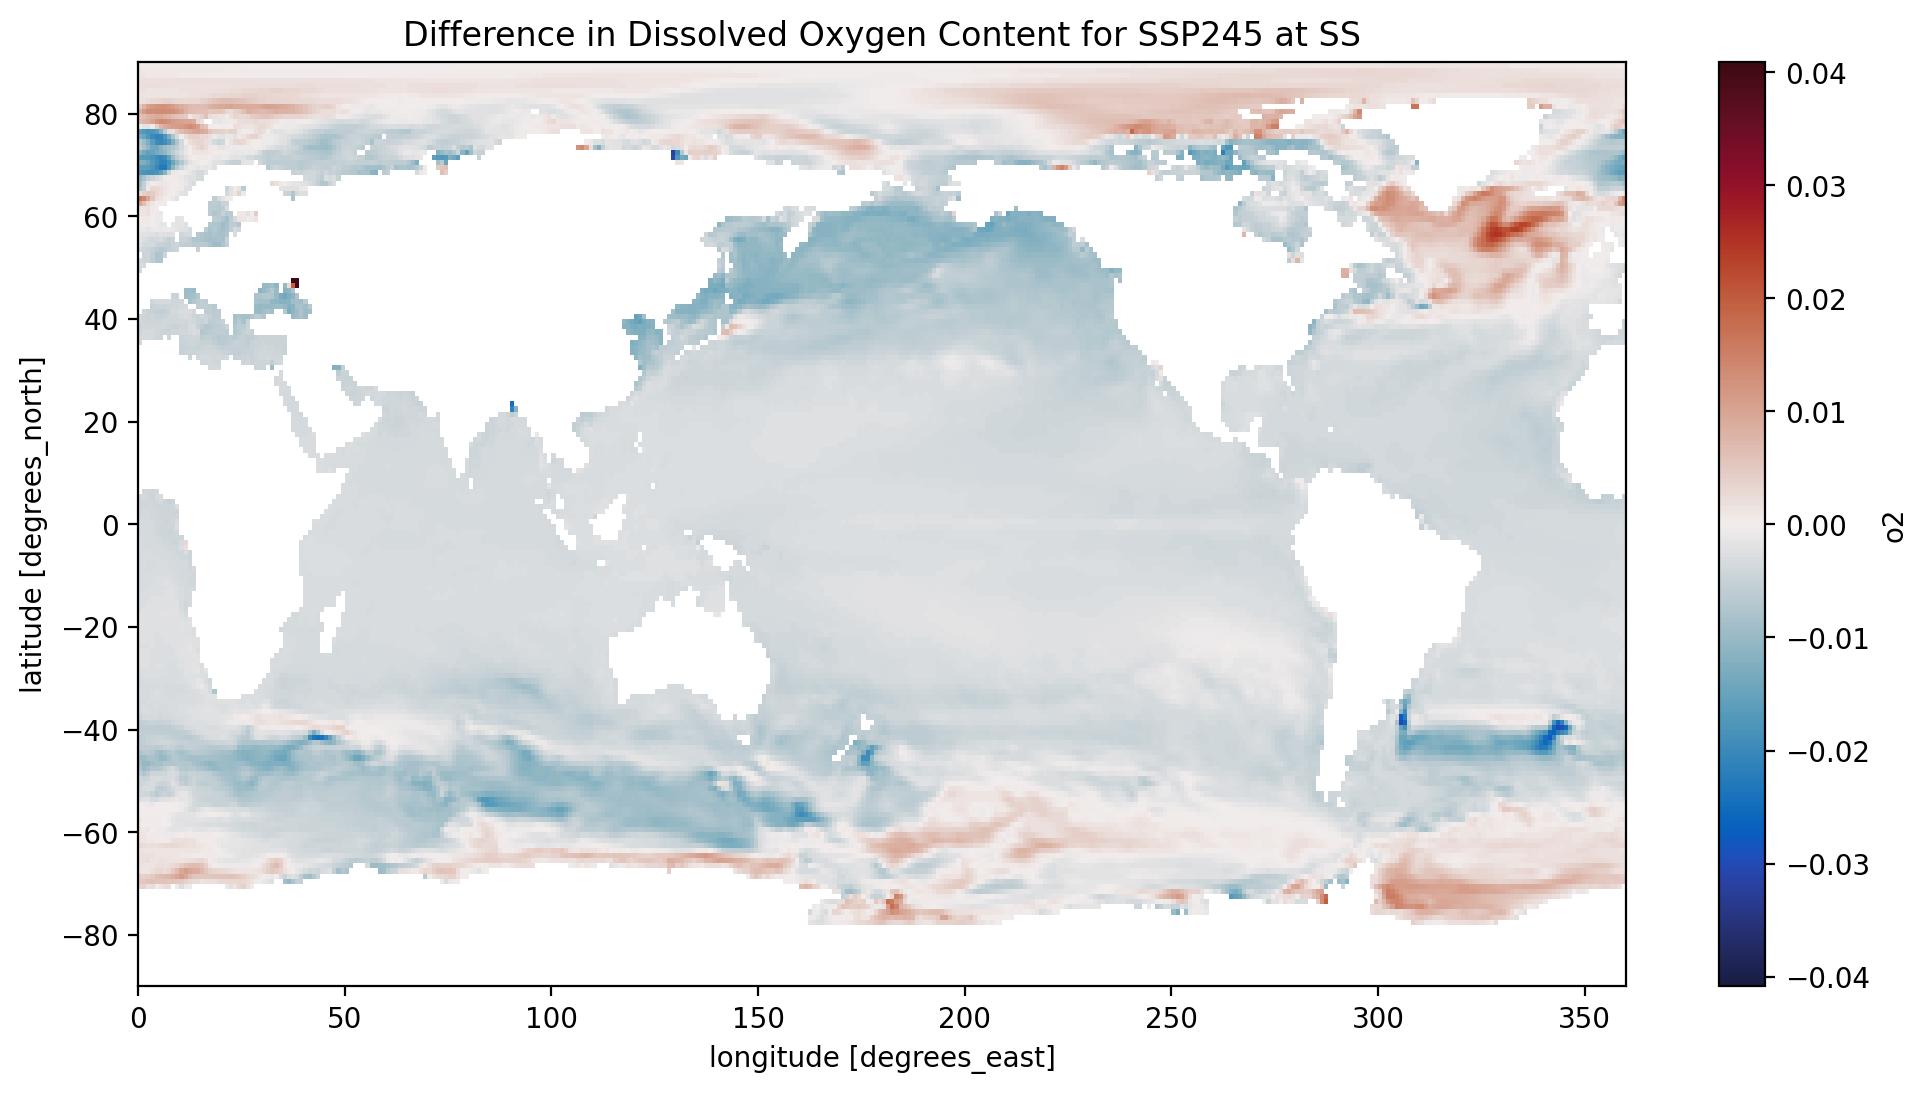

In [66]:
diff_245_O2_Surface = diff_O2_SSP245.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content for SSP245 at SS')

Text(0.5, 1.0, 'Difference in Dissolved Oxygen Content for SSP585 at SS')

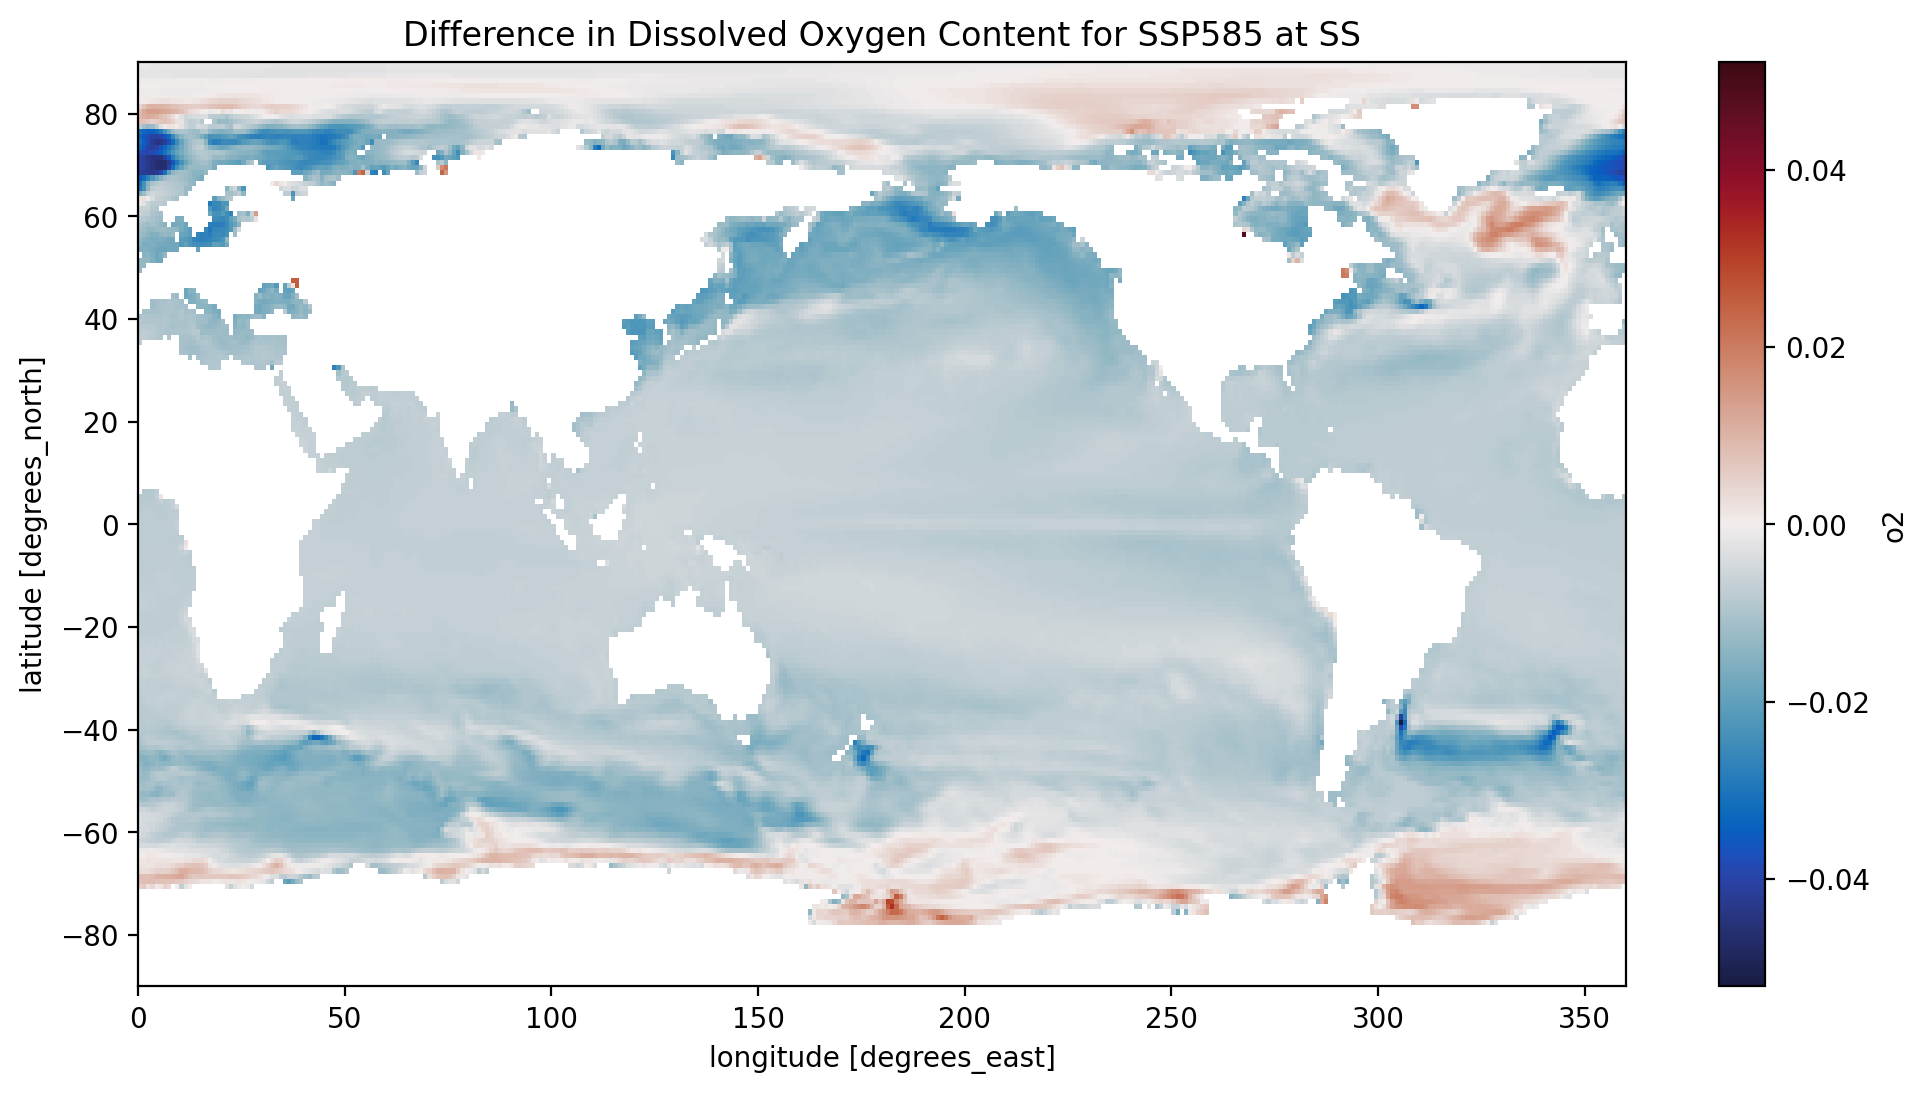

In [67]:
diff_585_O2_Surface = diff_O2_SSP585.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content for SSP585 at SS')

In [ ]:
zd_126_02= diff_O2_SSP126.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, vmin=-0.03,vmax=0.03, levels=30)
plt.title('Zonal Average of Dissolved Oxygen Content for SSP126')

Text(0.5, 1.0, 'Zonal Average of Dissolved Oxygen Content for SSP245')

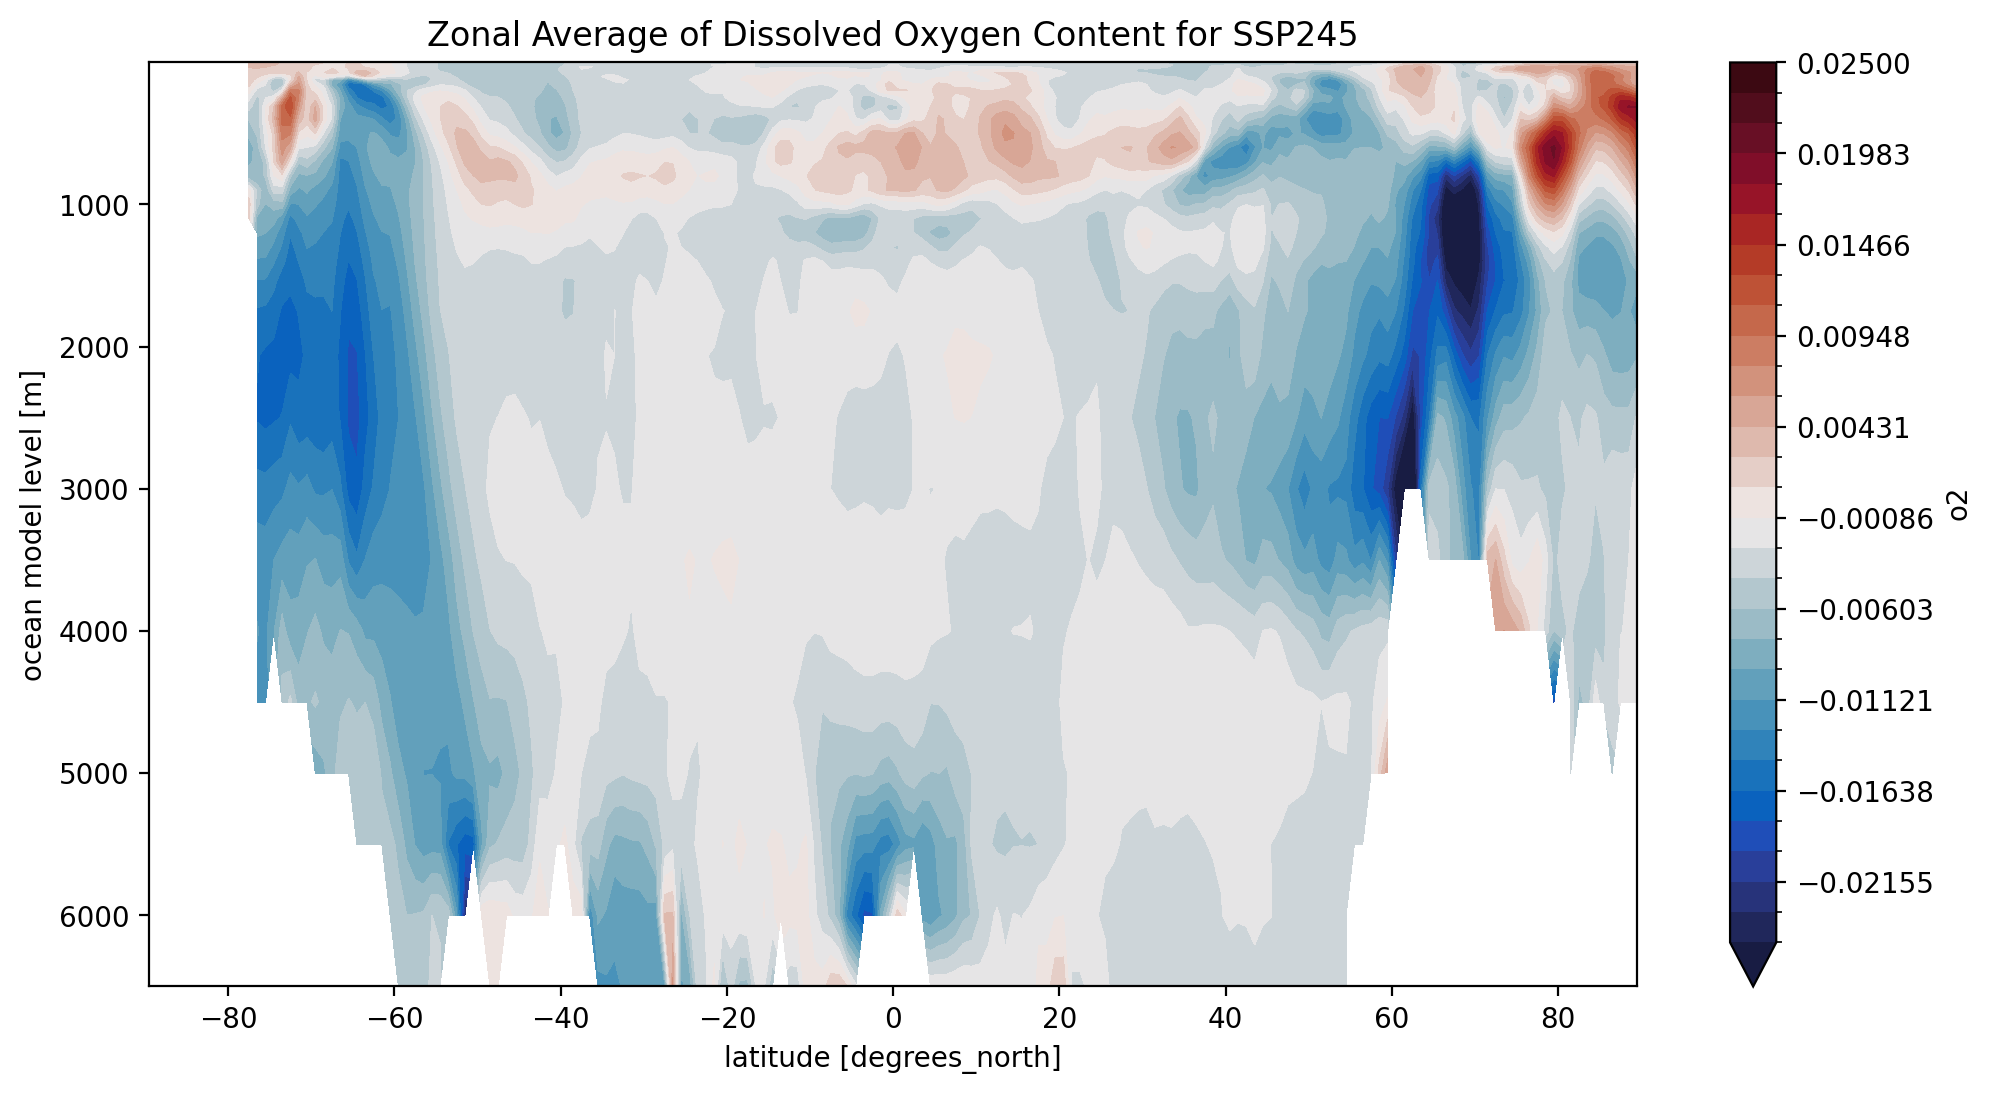

In [76]:
zd_245_02= diff_O2_SSP245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, vmin=-0.025,vmax=0.025,levels=30)
plt.title('Zonal Average of Dissolved Oxygen Content for SSP245')

Text(0.5, 1.0, 'Zonal Average of Dissolved Oxygen Content for SSP585')

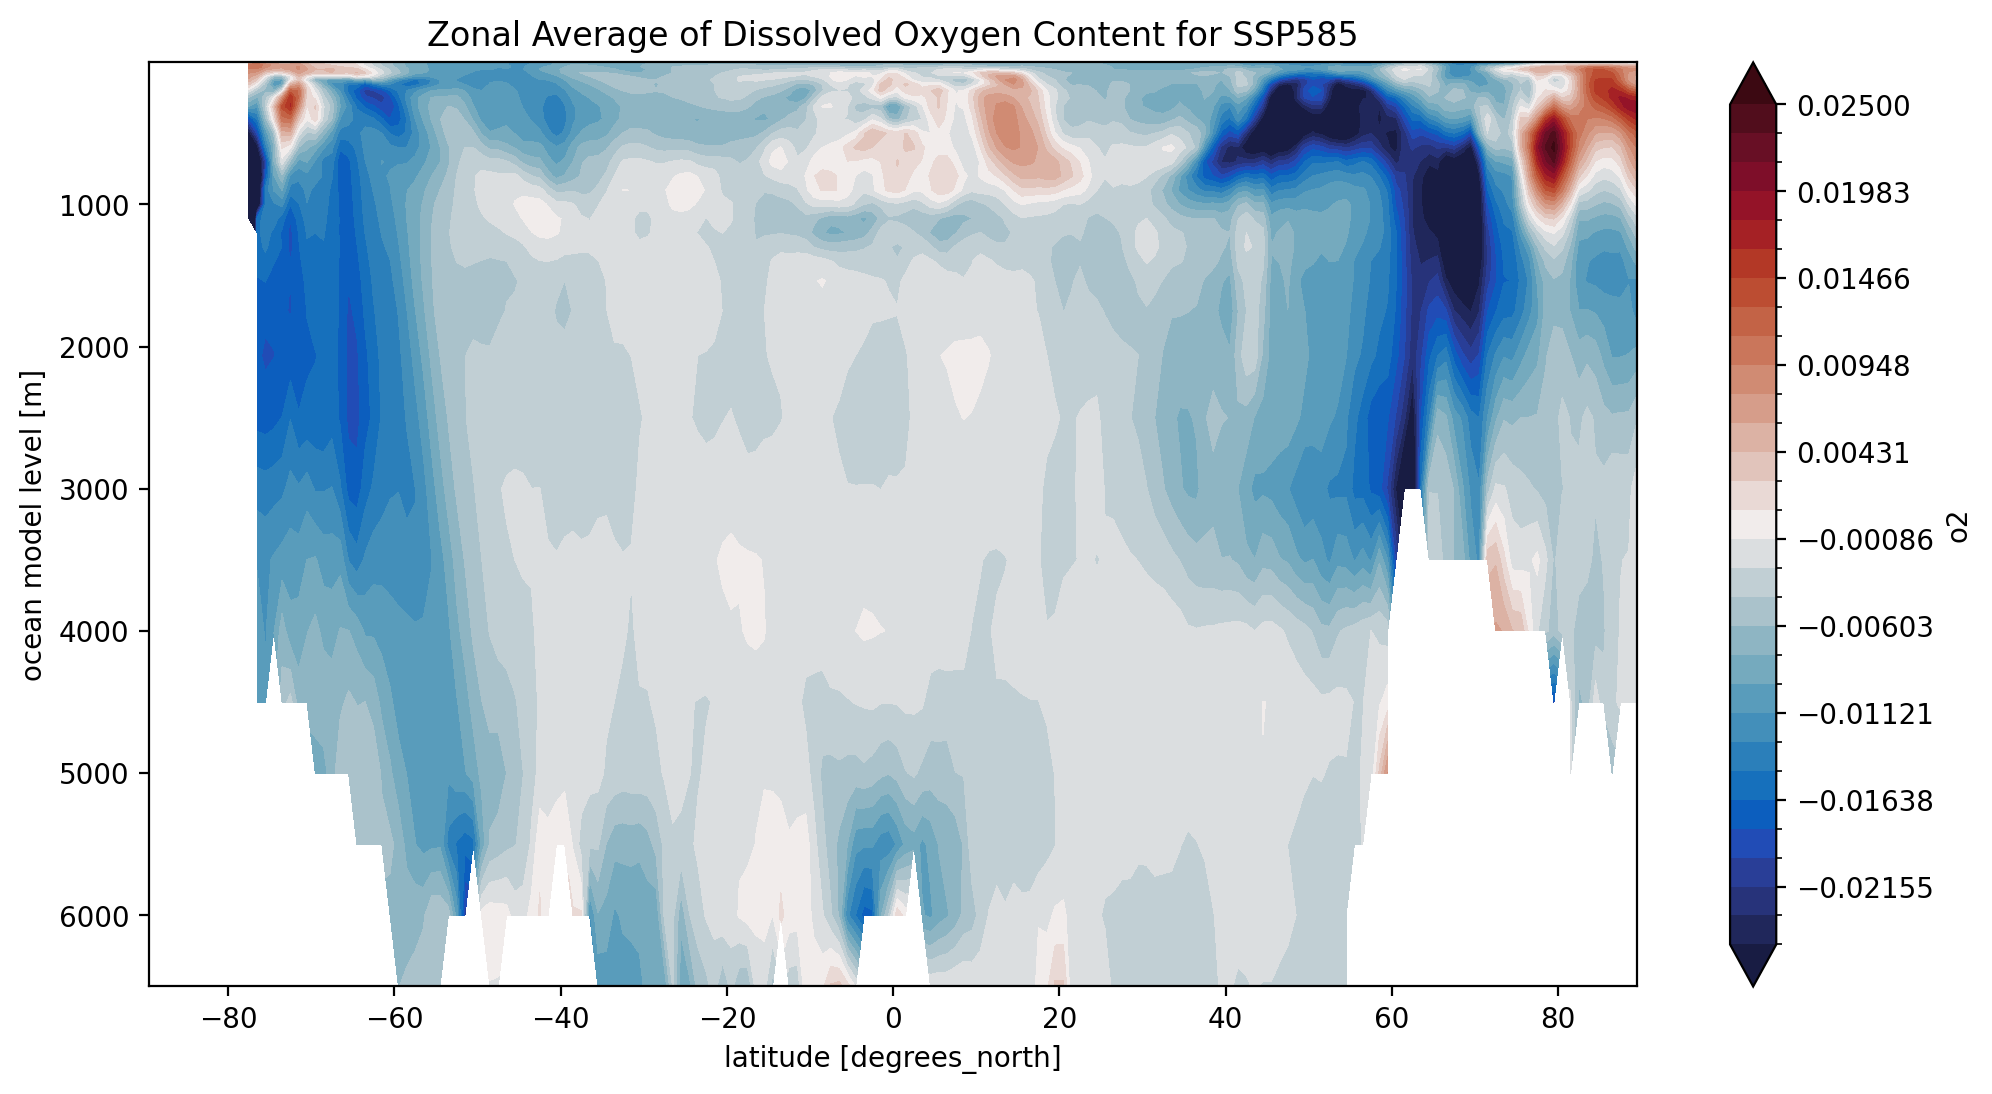

In [80]:
zd_585_02= diff_O2_SSP585.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, vmin=-0.025,vmax=0.025,levels=30)
plt.title('Zonal Average of Dissolved Oxygen Content for SSP585')